In [ ]:
# ..... get files for batch-correction estimation ..... #

In [2]:
library(Seurat)
library(dplyr)

In [23]:
currstage = 'stage16'

# get UMAPs for before-integration batch-mixing in clusters
immune.combined.sct = readRDS(paste0(currstage, '_integrated_cca.rds'))

# get all counts
s1 = CreateSeuratObject(counts = immune.combined.sct@assays$RNA@counts,                                                
                        meta.data = immune.combined.sct@meta.data)

# normalize and identify variable features for each dataset independently
s1 <- NormalizeData(s1)
s1 <- FindVariableFeatures(s1, selection.method = "vst", nfeatures = 3000)
s1 <- ScaleData(s1, verbose = FALSE)

Normalizing layer: counts

Finding variable features for layer counts



In [24]:
# run pca, umap
s1 <- RunPCA(s1, verbose = FALSE)
s1 <- RunUMAP(s1, reduction = "pca", dims = 1:30)

# cluster integrated data
s1 <- FindNeighbors(s1, reduction = "pca", dims = 1:30)
s1 <- FindClusters(s1, resolution = 0.5)

07:36:38 UMAP embedding parameters a = 0.9922 b = 1.112

Found more than one class "dist" in cache; using the first, from namespace 'spam'

Also defined by ‘BiocGenerics’

07:36:38 Read 19581 rows and found 30 numeric columns

07:36:38 Using Annoy for neighbor search, n_neighbors = 30

Found more than one class "dist" in cache; using the first, from namespace 'spam'

Also defined by ‘BiocGenerics’

07:36:38 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

07:36:41 Writing NN index file to temp file /tmp/RtmpTQfefD/filefa1e03d903f59

07:36:41 Searching Annoy index using 1 thread, search_k = 3000

07:36:46 Annoy recall = 100%

07:36:47 Commencing smooth kNN distance calibration using 1 thread
 with target n_neighbors = 30

07:36:48 Initializing from normalized Laplacian +

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 19581
Number of edges: 750909

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9393
Number of communities: 22
Elapsed time: 2 seconds


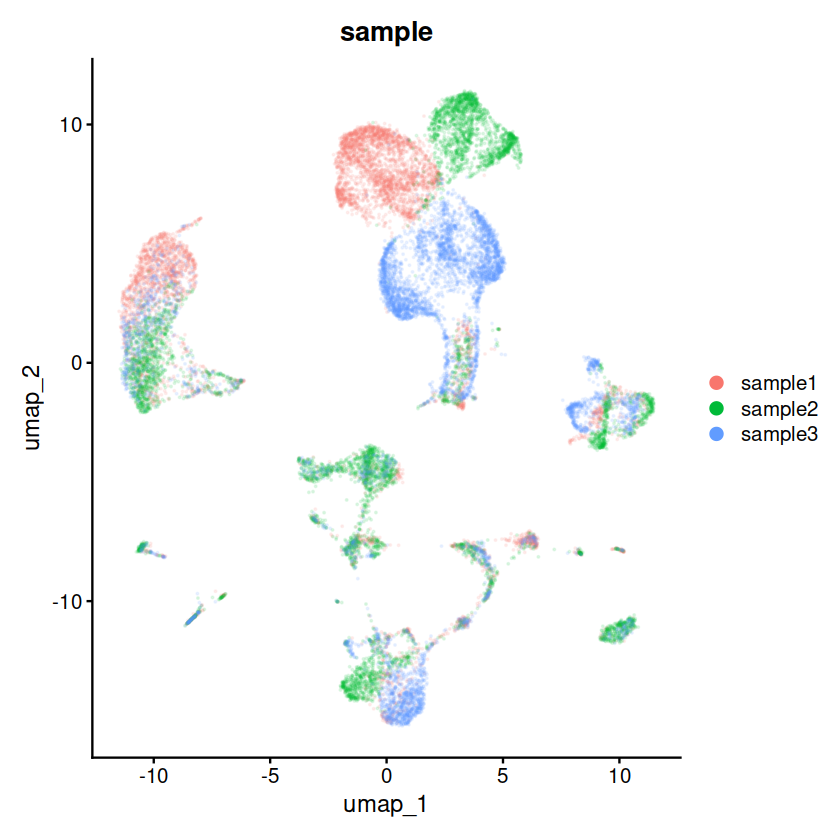

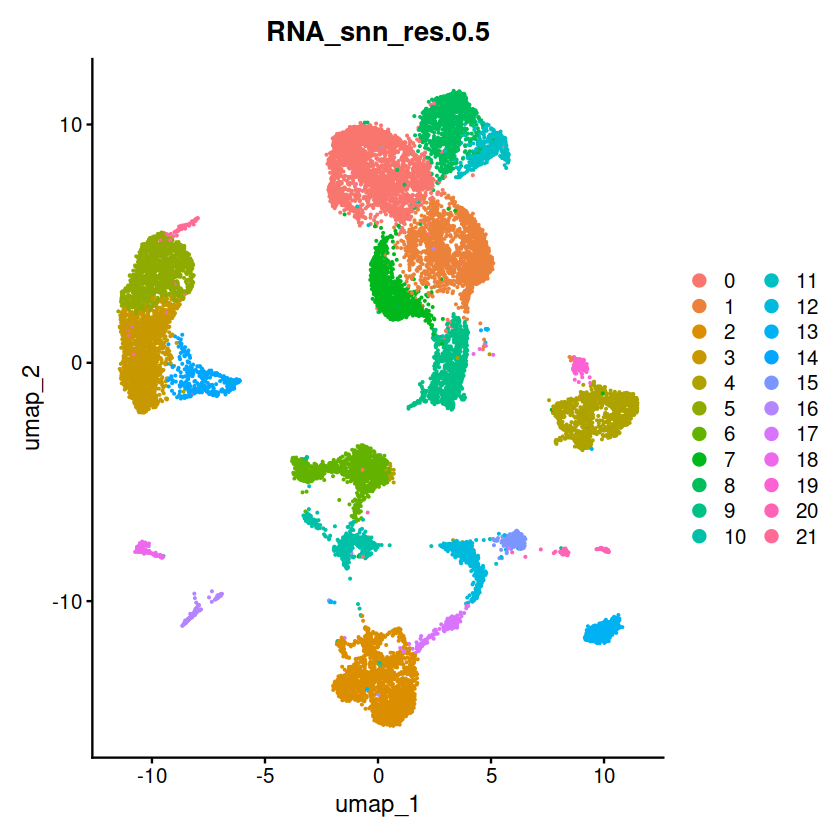

In [25]:
# plot integrated umap
tplot <- DimPlot(s1, reduction = "umap", group.by = "sample")
tplot[[1]]$layers[[1]]$aes_params$alpha =  .1
tplot

# plot integrated umap
DimPlot(s1, reduction = "umap", group.by = "RNA_snn_res.0.5")

In [26]:
dfnew = data.frame(stage = currstage, sample = s1$sample, before_cls = s1$RNA_snn_res.0.5, 
                   before_pc1 = s1@reductions$pca@cell.embeddings[,1],
                   before_pc2 = s1@reductions$pca@cell.embeddings[,2],
                   before_umap1 = s1@reductions$umap@cell.embeddings[,1],
                   before_umap2 = s1@reductions$umap@cell.embeddings[,2],
                   cca_cls = s1$integrated_snn_res.0.5,
                   cca_pc1 = immune.combined.sct@reductions$pca@cell.embeddings[,1],
                   cca_pc2 = immune.combined.sct@reductions$pca@cell.embeddings[,2],
                   cca_umap1 = immune.combined.sct@reductions$umap@cell.embeddings[,1],
                   cca_umap2 = immune.combined.sct@reductions$umap@cell.embeddings[,2])
dfnew[1:3,]

stage   sample  before_cls before_pc1
stage13_sample1_AAACCCAGTCGAGTTT-1 stage13 sample1 0          6.116759  
stage13_sample1_AAACCCAGTGGCCTCA-1 stage13 sample1 0          8.962798  
stage13_sample1_AAACCCATCTCCGTGT-1 stage13 sample1 0          7.999881  
                                   before_pc2 before_umap1 before_umap2 cca_cls
stage13_sample1_AAACCCAGTCGAGTTT-1  0.5345144  0.6224141   6.961060     4      
stage13_sample1_AAACCCAGTGGCCTCA-1 -0.2052849 -1.9171467   6.729545     1      
stage13_sample1_AAACCCATCTCCGTGT-1  1.2859882 -0.6978958   8.549536     0      
                                   cca_pc1   cca_pc2    cca_umap1 cca_umap2
stage13_sample1_AAACCCAGTCGAGTTT-1 -12.89110 -1.2617393 4.1886258 -8.465966
stage13_sample1_AAACCCAGTGGCCTCA-1 -14.44455 -1.1375768 8.4198680 -3.215625
stage13_sample1_AAACCCATCTCCGTGT-1 -14.44585 -0.2888071 0.7241977 -9.151154

In [27]:
# get data from rpca
s2 = readRDS(paste0(currstage, '_integrated_rpca.rds'))

dfnew$rpca_cls = s2$integrated_snn_res.0.5
dfnew$rpca_pc1 = s2@reductions$pca@cell.embeddings[,1]
dfnew$rpca_pc2 = s2@reductions$pca@cell.embeddings[,2]
dfnew$rpca_umap1 = s2@reductions$umap@cell.embeddings[,1]
dfnew$rpca_umap2 = s2@reductions$umap@cell.embeddings[,2]
dfnew[1:3,]

stage   sample  before_cls before_pc1
stage13_sample1_AAACCCAGTCGAGTTT-1 stage13 sample1 0          6.116759  
stage13_sample1_AAACCCAGTGGCCTCA-1 stage13 sample1 0          8.962798  
stage13_sample1_AAACCCATCTCCGTGT-1 stage13 sample1 0          7.999881  
                                   before_pc2 before_umap1 before_umap2 cca_cls
stage13_sample1_AAACCCAGTCGAGTTT-1  0.5345144  0.6224141   6.961060     4      
stage13_sample1_AAACCCAGTGGCCTCA-1 -0.2052849 -1.9171467   6.729545     1      
stage13_sample1_AAACCCATCTCCGTGT-1  1.2859882 -0.6978958   8.549536     0      
                                   cca_pc1   cca_pc2    cca_umap1 cca_umap2
stage13_sample1_AAACCCAGTCGAGTTT-1 -12.89110 -1.2617393 4.1886258 -8.465966
stage13_sample1_AAACCCAGTGGCCTCA-1 -14.44455 -1.1375768 8.4198680 -3.215625
stage13_sample1_AAACCCATCTCCGTGT-1 -14.44585 -0.2888071 0.7241977 -9.151154
                                   rpca_cls rpca_pc1  rpca_pc2  rpca_umap1
stage13_sample1_AAACCCAGTCGAGTTT-1 4        -12.01786 -3.717426 -5.0941734
stage13_sample1_AAACCCAGTGGCCTCA-1 1        -15.41346 -4.216345 -0.1823505
stage13_sample1_AAACCCATCTCCGTGT-1 0        -12.96286 -2.471269 -4.1027751
                                   rpca_umap2
stage13_sample1_AAACCCAGTCGAGTTT-1 8.875684  
stage13_sample1_AAACCCAGTGGCCTCA-1 6.588415  
stage13_sample1_AAACCCATCTCCGTGT-1 2.559750

In [29]:
# data from fastMNN
load(paste0(currstage, '_fastMNN.Rdata'))

pcs = reducedDims(combined)[['corrected']]
tsnes = reducedDims(combined)[['TSNE']]
dfnew$mnn_pc1 = unlist(pcs[,1])
dfnew$mnn_pc2 = unlist(pcs[,2])
dfnew$mnn_tsne1 = unlist(tsnes[,1])
dfnew$mnn_tsne2 = unlist(tsnes[,2])
dfnew[1:3,]

stage   sample  before_cls before_pc1
stage13_sample1_AAACCCAGTCGAGTTT-1 stage13 sample1 0          6.116759  
stage13_sample1_AAACCCAGTGGCCTCA-1 stage13 sample1 0          8.962798  
stage13_sample1_AAACCCATCTCCGTGT-1 stage13 sample1 0          7.999881  
                                   before_pc2 before_umap1 before_umap2 cca_cls
stage13_sample1_AAACCCAGTCGAGTTT-1  0.5345144  0.6224141   6.961060     4      
stage13_sample1_AAACCCAGTGGCCTCA-1 -0.2052849 -1.9171467   6.729545     1      
stage13_sample1_AAACCCATCTCCGTGT-1  1.2859882 -0.6978958   8.549536     0      
                                   cca_pc1   cca_pc2    ⋯ cca_umap2 rpca_cls
stage13_sample1_AAACCCAGTCGAGTTT-1 -12.89110 -1.2617393 ⋯ -8.465966 4       
stage13_sample1_AAACCCAGTGGCCTCA-1 -14.44455 -1.1375768 ⋯ -3.215625 1       
stage13_sample1_AAACCCATCTCCGTGT-1 -14.44585 -0.2888071 ⋯ -9.151154 0       
                                   rpca_pc1  rpca_pc2  rpca_umap1 rpca_umap2
stage13_sample1_AAACCCAGTCGAGTTT-1 -12.01786 -3.717426 -5.0941734 8.875684  
stage13_sample1_AAACCCAGTGGCCTCA-1 -15.41346 -4.216345 -0.1823505 6.588415  
stage13_sample1_AAACCCATCTCCGTGT-1 -12.96286 -2.471269 -4.1027751 2.559750  
                                   mnn_pc1   mnn_pc2    mnn_tsne1  mnn_tsne2
stage13_sample1_AAACCCAGTCGAGTTT-1 0.1773180 0.07191807 -25.534225  6.819065
stage13_sample1_AAACCCAGTGGCCTCA-1 0.2623202 0.08659178   3.979532 -5.028191
stage13_sample1_AAACCCATCTCCGTGT-1 0.2545302 0.10628124 -14.395743 11.666292

In [30]:
# data from scanorama
t1 = read.delim(paste0(currstage, '_scanorama_pca_hvg.csv'), sep = ',', header = F)
t2 = read.delim(paste0(currstage, '_scanorama_umap_hvg.csv'), sep = ',', header = F)
t3 = read.delim(paste0(currstage, '_scanorama_clusters_hvg.csv'), sep = ',', header = T)
dfnew$scanorama_cls = t3$clusters
dfnew$scanorama_pc1 = t1[,1]
dfnew$scanorama_pc2 = t1[,2]
dfnew$scanorama_umap1 = t2[,1]
dfnew$scanorama_umap2 = t2[,2]
dfnew[1:3,]

stage   sample  before_cls before_pc1
stage13_sample1_AAACCCAGTCGAGTTT-1 stage13 sample1 0          6.116759  
stage13_sample1_AAACCCAGTGGCCTCA-1 stage13 sample1 0          8.962798  
stage13_sample1_AAACCCATCTCCGTGT-1 stage13 sample1 0          7.999881  
                                   before_pc2 before_umap1 before_umap2 cca_cls
stage13_sample1_AAACCCAGTCGAGTTT-1  0.5345144  0.6224141   6.961060     4      
stage13_sample1_AAACCCAGTGGCCTCA-1 -0.2052849 -1.9171467   6.729545     1      
stage13_sample1_AAACCCATCTCCGTGT-1  1.2859882 -0.6978958   8.549536     0      
                                   cca_pc1   cca_pc2    ⋯ rpca_umap2 mnn_pc1  
stage13_sample1_AAACCCAGTCGAGTTT-1 -12.89110 -1.2617393 ⋯ 8.875684   0.1773180
stage13_sample1_AAACCCAGTGGCCTCA-1 -14.44455 -1.1375768 ⋯ 6.588415   0.2623202
stage13_sample1_AAACCCATCTCCGTGT-1 -14.44585 -0.2888071 ⋯ 2.559750   0.2545302
                                   mnn_pc2    mnn_tsne1  mnn_tsne2
stage13_sample1_AAACCCAGTCGAGTTT-1 0.07191807 -25.534225  6.819065
stage13_sample1_AAACCCAGTGGCCTCA-1 0.08659178   3.979532 -5.028191
stage13_sample1_AAACCCATCTCCGTGT-1 0.10628124 -14.395743 11.666292
                                   scanorama_cls scanorama_pc1 scanorama_pc2
stage13_sample1_AAACCCAGTCGAGTTT-1 0             0.2442419     0.07090212   
stage13_sample1_AAACCCAGTGGCCTCA-1 0             0.3317623     0.09258708   
stage13_sample1_AAACCCATCTCCGTGT-1 0             0.2994331     0.12118833   
                                   scanorama_umap1 scanorama_umap2
stage13_sample1_AAACCCAGTCGAGTTT-1 13.599419       7.010611       
stage13_sample1_AAACCCAGTGGCCTCA-1  9.295959       5.001098       
stage13_sample1_AAACCCATCTCCGTGT-1 14.799158       3.950873

In [31]:
# MetaMarker-based anno from Qiu and KS datasets
tab1 = read.delim(paste0(currstage, '_Qiu_celltypes.csv'), sep = ',')
tab1[1,]
tab2 = read.delim(paste0(currstage, '_Knight-Schrijver_celltypes.csv'), sep = ',')
tab2[1,]

barcode                            class          celltype         
1 stage13_sample1_AAACCCAGTCGAGTTT-1 Cardiomyocytes First heart field
  final_celltype   
1 First heart field

barcode                            class          celltype                  
1 stage13_sample1_AAACCCAGTCGAGTTT-1 Cardiomyocytes Ventricular_Cardiomyocytes
  final_celltype            
1 Ventricular_Cardiomyocytes

In [32]:
dfnew$Qiu_class = tab1$class[match(rownames(dfnew), tab1$barcode)]
dfnew$Qiu_celltype = tab1$final_celltype[match(rownames(dfnew), tab1$barcode)]
dfnew$KS_class = tab2$class[match(rownames(dfnew), tab2$barcode)]
dfnew$KS_celltype = tab2$final_celltype[match(rownames(dfnew), tab2$barcode)]

In [33]:
# save file
write.table(dfnew, file = paste0(currstage, '_batch_corrected_embeddings.csv'), sep = ',', row.names = T,
           col.names = T, quote = F)

In [ ]:
# Seurat to SCE
sc.seurat <- as.Seurat(combined, counts = "counts", data = "logcounts")